# Ortogonalni skupovi funkcija

Sadržaj:
1. [Uvod](#Uvod)
1. [Trigonometrijske funkcije kao ortogonalna baza](#Trigonometrijske-funkcije-kao-ortogonalna-baza)
1. [Diskretizacija](#Diskretizacija)
1. [Diskretna Furijeova transformacija](#Diskretna-Furijeova-transformacija)

In [1]:
import numpy as np
import numpy.random as rndm
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Uvod

Kao što smo sa konačnodimenzionalnih vektora izvršili prelaz na beskonačno dimenzionalne, tako i ortogonalni skupovi vektora mogu međusobno da se povezuju. Ključ je u izboru intervala na kome će se računati odgovarajući skalarni proizvod.

**Primer 1.** [Adamarove matrice](https://en.wikipedia.org/wiki/Hadamard_matrix) $H_n$ su kvadratne matrice reda $n$ sa elementima iz skupa $\{1,-1\}$ za koje važi  $$H_nH_n^T=nI.\tag{1}$$
Na osnovu $(1)$ sledi da je $H_n^{-1}=\dfrac1n H_n^T.$
Adamarove matrice su sa međusobno ortogonalnim vrstama, i ortogonalnim kolonama. Skaliranjem $\dfrac1{\sqrt{n}}H_n$ Adamarove matrice postaju ortogonalne matrice.

Primeri Adamarovih matrica reda $2,4$ i $8$ su
$$
H_2=\begin{bmatrix}1&1\\1&-1\end{bmatrix},\qquad
H_4=H_2\otimes H_2=\begin{bmatrix}H_2&H_2\\H_2&-H_2\end{bmatrix}=\begin{bmatrix}1&1&1&1\\1&-1&1&-1\\1&1&-1&-1\\1&-1&-1&1\end{bmatrix}
,\qquad
H_8=H_2\otimes H_4=\begin{bmatrix}H_4&H_4\\H_4&-H_4\end{bmatrix}.
$$

In [2]:
H2=np.ones((2,2))
H2[1,1]=-1
H2

array([[ 1.,  1.],
       [ 1., -1.]])

Proverimo relaciju $(1)$ za matricu $H_2.$

In [3]:
H2@H2.T , H2.T@H2

(array([[2., 0.],
        [0., 2.]]),
 array([[2., 0.],
        [0., 2.]]))

Formiraćemo maricu $H_4$ Kronekerovim proizvodom.

In [4]:
H4=np.kron(H2,H2)
H4

array([[ 1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1.],
       [ 1.,  1., -1., -1.],
       [ 1., -1., -1.,  1.]])

Proverimo relaciju $(1)$ za matricu $H_4.$

In [5]:
H4@H4.T , H4.T@H4

(array([[4., 0., 0., 0.],
        [0., 4., 0., 0.],
        [0., 0., 4., 0.],
        [0., 0., 0., 4.]]),
 array([[4., 0., 0., 0.],
        [0., 4., 0., 0.],
        [0., 0., 4., 0.],
        [0., 0., 0., 4.]]))

Postupak ponavljamo i za matricu $H_8.$

In [6]:
H8=np.kron(H2,H4)
H8

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1., -1.,  1., -1.,  1., -1.,  1., -1.],
       [ 1.,  1., -1., -1.,  1.,  1., -1., -1.],
       [ 1., -1., -1.,  1.,  1., -1., -1.,  1.],
       [ 1.,  1.,  1.,  1., -1., -1., -1., -1.],
       [ 1., -1.,  1., -1., -1.,  1., -1.,  1.],
       [ 1.,  1., -1., -1., -1., -1.,  1.,  1.],
       [ 1., -1., -1.,  1., -1.,  1.,  1., -1.]])

In [7]:
H8@H8.T , H8.T@H8

(array([[8., 0., 0., 0., 0., 0., 0., 0.],
        [0., 8., 0., 0., 0., 0., 0., 0.],
        [0., 0., 8., 0., 0., 0., 0., 0.],
        [0., 0., 0., 8., 0., 0., 0., 0.],
        [0., 0., 0., 0., 8., 0., 0., 0.],
        [0., 0., 0., 0., 0., 8., 0., 0.],
        [0., 0., 0., 0., 0., 0., 8., 0.],
        [0., 0., 0., 0., 0., 0., 0., 8.]]),
 array([[8., 0., 0., 0., 0., 0., 0., 0.],
        [0., 8., 0., 0., 0., 0., 0., 0.],
        [0., 0., 8., 0., 0., 0., 0., 0.],
        [0., 0., 0., 8., 0., 0., 0., 0.],
        [0., 0., 0., 0., 8., 0., 0., 0.],
        [0., 0., 0., 0., 0., 8., 0., 0.],
        [0., 0., 0., 0., 0., 0., 8., 0.],
        [0., 0., 0., 0., 0., 0., 0., 8.]]))

Važi i opštije tvrđenje: 
>za Adamarove matrice $H_m$ i $H_n$, Kronekerov proizvod matrica $H_m\otimes H_n$ je ponovo Adamarova matrica reda $mn.$ 

Na ovaj način mogu da se konstruišu Adamarove matrice reda $2^n.$ Ako je $H_{2^{n-1}}$ Adamarova matrica, tada je i $H_{2^{n}}=H_2\otimes H_{2^{n-1}}$ takođe Adamarova matrica. Niz generisanih Adamarovih matrica $H_{2^{n}},\ n\in\mathbb{N}_0,$ naziva se još i [Volšove matrice](https://en.wikipedia.org/wiki/Walsh_matrix).

Vrste (ili kolone) Adamarove matrice $H_{2^{n}}$ definišu skup funkcija $W_{k,2^{n}}(t):[0,1]\mapsto\{1,-1\},\quad k=0,1,\dots,2^{n}-1.$ 

Recimo, za $n=1,$ imamo
$H_2=\begin{bmatrix}1&1\\1&-1\end{bmatrix}$ i funkcije
$$W_{0,2}(t)=1,\ t\in[0,1],\qquad W_{1,2}(t)=\begin{cases}1,&t\in[0,1/2)\\-1,&t\in[1/2,1]\end{cases}.$$

Primetimo da važi $W_{0,2}\cdot W_{1,2}=0$ i $\|W_{0,2}\|=\|W_{1,2}\|=1.$

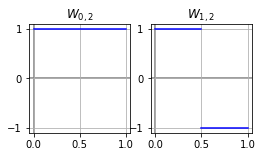

In [8]:
plt.figure(figsize=(4,2))

plt.subplot(1, 2, 1)
plt.title(r"$W_{0,2}$")
plt.plot([0,1],[1,1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0, 1/2, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

plt.subplot(1, 2, 2)
plt.title(r"$W_{1,2}$")
plt.plot([0,1/2],[1,1],'-b',[1/2,1],[-1,-1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0, 1/2, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

Slično, $H_4=\begin{bmatrix}1&1&1&1\\1&-1&1&-1\\1&1&-1&-1\\1&-1&-1&1\end{bmatrix}$ indukuje funkcije
$$W_{0,4}(t)=W_{0,2}(t)=1,\ t\in[0,1],\qquad W_{1,4}(t)=\begin{cases}1,&t\in[0,1/4)\cup[1/2,3/4)\\-1,&t\in[1/4,1/2)\cup[3/4,1]\end{cases},
$$
$$W_{2,4}(t)=W_{1,2}(t)=\begin{cases}1,&t\in[0,1/2)\\-1,&t\in[1/2,1]\end{cases},\qquad
W_{3,4}(t)=\begin{cases}1,&t\in[0,1/4)\cup[3/4,1]\\-1,&t\in[1/4,3/4)\end{cases}
,$$
koje su ortogonalne u parovima i norme $1.$

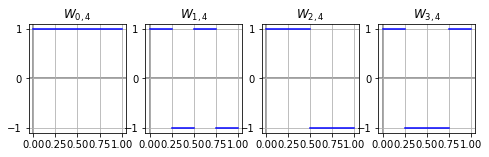

In [9]:
plt.figure(figsize=(8,2))

plt.subplot(1, 4, 1)
plt.title(r"$W_{0,4}$")
plt.plot([0,1],[1,1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0,1/4, 1/2, 3/4, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

plt.subplot(1, 4, 3)
plt.title(r"$W_{2,4}$")
plt.plot([0,1/2],[1,1],'-b',[1/2,1],[-1,-1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0,1/4, 1/2, 3/4, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

plt.subplot(1, 4, 2)
plt.title(r"$W_{1,4}$")
plt.plot([0,1/4],[1,1],'-b',[1/2,3/4],[1,1],'-b')
plt.plot([1/4,1/2],[-1,-1],'-b',[3/4,1],[-1,-1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0,1/4, 1/2, 3/4, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

plt.subplot(1, 4, 4)
plt.title(r"$W_{3,4}$")
plt.plot([0,1/4],[1,1],'-b',[3/4,1],[1,1],'-b')
plt.plot([1/4,3/4],[-1,-1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0,1/4, 1/2, 3/4, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

Nastavljajući postupak podele intervala $[0,1]$ na podsegmente dužine $1/2^n$ dobijamo i ostale funkcije $W_{k,2^n}(t).$

**Primer 2.** Harove matrice $W_n$ su kvadratne matrice ortogonalnih kolona koja sadrži jedino vrednosti $1,-1$ i $0.$ Primer Harove matrice reda $4$ je
$$W_4=\begin{bmatrix}1&1&1&0\\1&1&-1&0\\1&-1&0&1\\1&-1&0&-1\end{bmatrix},\qquad 
W_4^TW_4=\begin{bmatrix}4I_2&O_2\\O_2&2I_2\end{bmatrix}={\rm diag}(4,4,2,2).$$

In [11]:
W4=np.array([[1,1,1,0],[1,1,-1,0],[1,-1,0,1],[1,-1,0,-1]])
D=W4.T@W4
D

array([[4, 0, 0, 0],
       [0, 4, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 2]])

In [12]:
np.linalg.inv(W4)

array([[ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [ 0.5 , -0.5 , -0.  , -0.  ],
       [-0.  , -0.  ,  0.5 , -0.5 ]])

In [13]:
d=np.diag(D)
(W4/d).T

array([[ 0.25,  0.25,  0.25,  0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [ 0.5 , -0.5 ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.5 , -0.5 ]])

Harove matrice dimenzije $2^n$ mogu rekurzivno da se konstruišu, slično kao i Adamarove matrice. 
$$W_{2^n}=\begin{bmatrix}W_{2^{n-1}}\otimes\begin{bmatrix}1\\1\end{bmatrix}&
I_{2^{n-1}}\otimes\begin{bmatrix}1\\-1\end{bmatrix}\end{bmatrix}.$$

In [15]:
W8=np.block([np.kron(W4,np.ones((2,1))),np.kron(np.eye(4),np.array([[1],[-1]]))])
W8

array([[ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  0., -1., -0., -0., -0.],
       [ 1.,  1., -1.,  0.,  0.,  1.,  0.,  0.],
       [ 1.,  1., -1.,  0., -0., -1., -0., -0.],
       [ 1., -1.,  0.,  1.,  0.,  0.,  1.,  0.],
       [ 1., -1.,  0.,  1., -0., -0., -1., -0.],
       [ 1., -1.,  0., -1.,  0.,  0.,  0.,  1.],
       [ 1., -1.,  0., -1., -0., -0., -0., -1.]])

In [16]:
D8=W8.T@W8
print(D8)
D8=np.diag(D8)

[[8. 0. 0. 0. 0. 0. 0. 0.]
 [0. 8. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 4. 0. 0. 0. 0.]
 [0. 0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 2.]]


In [17]:
W16=np.block([np.kron(W8,np.ones((2,1))),np.kron(np.eye(8),np.array([[1],[-1]]))])
D16=W16.T@W16
print(D16)

[[16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 16.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  8.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  4.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2. 

Možemo da primetimo da su matrice $W_{2^n}$ retko posednute. Ukoliko uvedemo oznaku $D_2=2I_2,\quad D_{2^n}=2\begin{bmatrix}D_{2^{n-1}}&O\\O&I_{2^{n-1}}\end{bmatrix},$ tada za Harove matrice važi $W_{2^n}^T W_{2^n}=D_{2^n}.$ Kolone Harove matrice mogu da se normalizuju za dobijanje ortonormirane matrice. Matrice $H_{2^n}=W_{2^n}D_{2^n}^{-1/2}$ zovemo matrice diskretne Harove transformacije.

In [18]:
nW8=W8/np.sqrt(D8)
print(np.round(nW8,3))

[[ 0.354  0.354  0.5    0.     0.707  0.     0.     0.   ]
 [ 0.354  0.354  0.5    0.    -0.707 -0.    -0.    -0.   ]
 [ 0.354  0.354 -0.5    0.     0.     0.707  0.     0.   ]
 [ 0.354  0.354 -0.5    0.    -0.    -0.707 -0.    -0.   ]
 [ 0.354 -0.354  0.     0.5    0.     0.     0.707  0.   ]
 [ 0.354 -0.354  0.     0.5   -0.    -0.    -0.707 -0.   ]
 [ 0.354 -0.354  0.    -0.5    0.     0.     0.     0.707]
 [ 0.354 -0.354  0.    -0.5   -0.    -0.    -0.    -0.707]]


Ortogonalne funkcije $\psi_{k,2^n}:[0,1]\mapsto\{0,1,-1\}$ indukovane kolonama Harovih matrica nazivaju se Harovi vejvleti ili talasići.

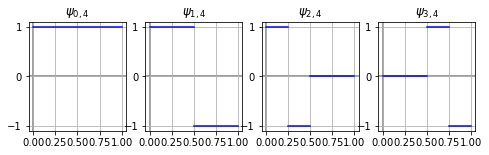

In [19]:
plt.figure(figsize=(8,2))

plt.subplot(1, 4, 1)
plt.title(r"$\psi_{0,4}$")
plt.plot([0,1],[1,1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0,1/4, 1/2, 3/4, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

plt.subplot(1, 4, 2)
plt.title(r"$\psi_{1,4}$")
plt.plot([0,1/2],[1,1],'-b',[1/2,1],[-1,-1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0,1/4, 1/2, 3/4, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

plt.subplot(1, 4, 3)
plt.title(r"$\psi_{2,4}$")
plt.plot([0,1/4],[1,1],'-b',[1/4,1/2],[-1,-1],'-b',[1/2,1],[0,0],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0,1/4, 1/2, 3/4, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

plt.subplot(1, 4, 4)
plt.title(r"$\psi_{3,4}$")
plt.plot([0,1/2],[0,0],'-b',[1/2,3/4],[1,1],'-b',[3/4,1],[-1,-1],'-b')
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1)
plt.xticks([0,1/4, 1/2, 3/4, 1])
plt.yticks([-1, 0, 1])
plt.ylim([-1.1, 1.1])
plt.grid();

Harove matrice i funckije indukovane njima predstavljaju prve konstruisane vejvlet transformacije kontinualnog i diskretnog tipa. U međuvremenu vejvlet zajednica se značajno proširila zbog svoje velike primene u analizi signala. 

**Primer 3.** [Vremenski niz](https://en.wikipedia.org/wiki/Time_series) ili vremenska serija (time-series) predstavlja niz vrednosti neke praćene veličine (obeležja) čije su komponente hronološki uređene. Vremensku seriju mogu da predstavljaju podaci o plimi i oseci, temperaturi vazduha, cenama akcije na berzi, zauzetosti nekog resursa, protoku podataka, itd. 

Komponente vremenske serije su indeksirane vremenskim trenucima u kojima je praćena veličina merena. Zbog toga indeksiranje može da bude kontinualno ili diskretno.
$$\mathcal{X}=\{X_t,\ t\in T\}\qquad\mbox{ ili }\qquad \mathcal{X}=\{X_{t_k},\ k\in \mathbb{N}_0\}
\qquad\mbox{ ili }\qquad \mathcal{X}=\{X_{t_k},\ 0\leq k\leq n\}.$$
 Najčešće se merenja obeležja vrše diskretno sa razmakom jednakih vremenskih intervala. U tom slučaju se koristi indeksiranje vremenskih serija kao kod vektora - prema rednom broju vremenskog trenutka,
 $$\mathcal{X}=\{X_{t_k},\ k\in \mathbb{N}_0\}=\{X_{k},\ k\in \mathbb{N}_0\}
 \qquad\mbox{ ili }\qquad \mathcal{X}=\{X_{k},\ 0\leq k\leq n\}.$$

Tako vektor temperature vazduha meren svake sekunde tokom jednog sata predstavljaće vektor vrednosti $\mathcal{T}\in\mathbb{R}^{3600}.$

Česta pojava kod vremenskih serija jeste da su uzastopne komponente sa veoma bliskim vrednostima. Zbog toga, prilikom obrade vremenskih serija, postaju  bitne informacije koje se odnose na značajne skokove u vrednostima između komponenti tokom vremena. Harove matrice u diskretnom slučaju, i vejvleti u kontinualnom slučaju, služe upravo za ekstrakciju bitnih promena vrednosti unutar vremenskih serija. S obzirom da su elementi svake kolone matrice $W_{2^n}$ isključivo brojevi $1,0,-1,$ proizvod 
$W_{2^n}^Tv$ kao rezultat daje zbir i razlike pojedinih komponenti vektora $v.$ Samim tim izračunavanje ovog proizvoda je operacijski efikasna procedura jer ne koristi množenje. Osim toga, nije potrebna ni konstrukcija Harove matrice. Odgovarajuće razlike se sprovode indeksiranjem elemenata niza.
Različiti rasporedi nula i jedinica unutar matrice $W_{2^n}$ omogućavaju ispitivanje promena vrednosti nad više različitih blokova podataka vremenske serije. Te varijacije se normalizuju korenom komponenti dijagonalne matrice $D_{2^n}.$ 

In [20]:
v=np.array([8,6,2,3,4,6,6,5])
Hv=W8.T@v

In [21]:
Hv=Hv/np.sqrt(D8)
print(np.round(Hv,3))

[14.142 -0.707  4.5   -0.5    1.414 -0.707 -1.414  0.707]


In [22]:
np.round(nW8.T@v,3)

array([14.142, -0.707,  4.5  , -0.5  ,  1.414, -0.707, -1.414,  0.707])

Originalni podaci vremenske serije dobijaju se množenjem matricom $W_{2^n}.$

In [23]:
nW8@Hv

array([8., 6., 2., 3., 4., 6., 6., 5.])

Transformacija normalizovanom matricom $W_{2^n}^T$  proizvodi koordinate vektora $v$ u odnosu na ortonormiranu bazu kolona.  Koordinate vektora $v$ u odnosu na ovu bazu koje su bliske nuli obično se odbacuju, tj. tretiraju se kao nula. Na taj način dobijamo aproksimaciju vektora vremenske serije, odnosno njenu kompresovanu reprezentaciju. 

## Trigonometrijske funkcije kao ortogonalna baza

Posmatramo trigonometrijske funkcije $\sin(kt),\ \cos(mt),\ k\in\mathbb{N},\ m\in\mathbb{N}_0$ na segmentu $[-\pi,\pi].$ S obzirom da je $\sin$ neparna, a $\cos$ parna funkcija, to je proizvod $\sin(kt)\cos(mt)$ ponovo neparna funckija. Zbog toga su ove funkcije međusobno ortogonalne na segmentu $[-\pi,\pi],$
$$\int_{-\pi}^{\pi}\sin(kt)\cos(mt)\,dt=0.$$
Osim toga, za $k\neq m,$ je
\begin{align}
\displaystyle\int_{-\pi}^{\pi}\sin(kt)\sin(mt)\,dt&=\dfrac{2m\sin(k\pi)\cos(m\pi)-2k\cos(k\pi)\sin(m\pi)}{k^2-m^2}
=0,\\
\displaystyle\int_{-\pi}^{\pi}\cos(kt)\cos(mt)\,dt&=\dfrac{2k\sin(k\pi)\cos(m\pi)-2m\cos(k\pi)\sin(m\pi)}{k^2-m^2}
=0,
\end{align}
pa je skup funkcija $\sin(kt),\ \cos(mt),\ k,m\in\mathbb{N}$ ortogonalan na segmentu $[-\pi,\pi].$ 

Funkcije $\cos(k x)$ i $\sin(k x)$ nazivamo osnovnim harmonicima. Osnovna perioda funkcija $\cos(k x)$ i $\sin(k x)$ iznosi $\dfrac{2\pi}{k}.$

Za norme funkcija osnovnih harmonika važi
$$\int_{-\pi}^{\pi}\,dt=2\pi,\qquad \int_{-\pi}^{\pi}\sin^2(kt)\,dt=\int_{-\pi}^{\pi}\cos^2(kt)\,dt=\pi.$$
Zaista,
\begin{align}
\displaystyle\int_{-\pi}^{\pi}\cos^2(kt)\,dt&=2\int_{0}^{\pi}\cos^2(kt)\,dt=2\int_{0}^{\pi}\dfrac{1+\cos(2kt)}{2}\,dt
=\int_{0}^{\pi}\,dt+\int_{0}^{\pi}\cos(2kt)\,dt=\pi\\
\int_{-\pi}^{\pi}\sin^2(kt)\,dt&=\int_{-\pi}^{\pi}\big(1-\cos^2(kt)\big)\,dt=2\pi-\pi=\pi.
\end{align}

Skaliranjem funkcija osnovnih harmonika dobijamo ortonormiranu bazu $\dfrac1{\sqrt{2\pi}},\ \dfrac1{\sqrt{\pi}}\cos(kt),\ \dfrac1{\sqrt{\pi}}\sin(kt),\ k\in\mathbb{N}.$ 

Za trigonometrijske funkcije važi $\cos(t\pm\pi)=-\cos(t)$ i $\sin(t\pm\pi)=-\sin(t).$ Ove jednakosti omogućavaju dokaz ortogonalnosti osnovnih harmonika i na segmentu $[0,2\pi]$ preko prethodnih rezultata. Npr.
\begin{align}
\displaystyle\int_0^{2\pi}\sin(kt)\cos(mt)\,dt&=\begin{vmatrix}u=t-\pi& du=dt\\
0\mapsto-\pi&2\pi\mapsto\pi\end{vmatrix}=\displaystyle\int_{-\pi}^{\pi}\sin(k(u+\pi))\cos(m(u+\pi))\,du\\
&=(-1)^{k+m}\displaystyle\int_{-\pi}^{\pi}\sin(ku)\cos(mu)\,du=0.
\end{align}

Dakle, ortogonalnost i vrednosti norme ostaju za osnovne harmonike i na segmentu $[0,2\pi].$

Linearna kombinacija $a_0+\displaystyle\sum_{k\in\mathbb{N}}\big(a_k\cos(kt)+b_k\sin(kt)\big)$ naziva se Furijeov red. Koordinate funkcije $f:[-\pi,\pi]\mapsto\mathbb{R}$ u odnosu na ortonormiranu bazu su Furijeove koordinate koje računamo pomoću skalarnog proizvoda, 
$a_k=\dfrac{f(t)\cdot\cos(kt)}{\cos(kt)\cdot\cos(kt)}$ i  $b_k=\dfrac{f(t)\cdot\sin(kt)}{\sin(kt)\cdot\sin(kt)}\,.$ Zamenom izraza za skalarni proizvod na $[-\pi,\pi]$ dobijamo Furijeove koordinate funkcije $f:$
$$a_0=\dfrac{1}{2\pi}\int_{-\pi}^{\pi}f(t)\,dt,\qquad a_k= \dfrac{1}{\pi}\int_{-\pi}^{\pi}f(t)\cos(kt)\,dt,
\qquad b_k= \dfrac{1}{\pi}\int_{-\pi}^{\pi}f(t)\sin(kt)\,dt.\tag{2}$$
Primetimo da je koeficijent $a_0$ srednja vrednost funkcije $f$ na intervalu $[-\pi,\pi].$

Analogne formule primenjuju se i za Furijeov razvoj funkcije na segmentu $[0,2\pi],$
$$a_0=\dfrac{1}{2\pi}\int_{0}^{2\pi}f(t)\,dt,\qquad a_k= \dfrac{1}{\pi}\int_{0}^{2\pi}f(t)\cos(kt)\,dt,
\qquad b_k= \dfrac{1}{\pi}\int_{0}^{2\pi}f(t)\sin(kt)\,dt.\tag{3}$$

Koeficijenti iz formula $(2)$ i $(3)$ mogu da se odrede i numeričkom integracijom. 

Preslikavanje $f\mapsto \begin{bmatrix}a_0&a_1&b_1&a_2&b_2&\dots\end{bmatrix}^T$ zovemo Furijeova transformacija funkcije $f.$ Njom se $f$ izražava preko amplituda osnovnih harmonika. Ovom transformacijom se funkcija koja zavisi od prostora ili vremena izražava kao linearna kombinacija funkcija koje zavise od frekvencija.

Izbor segmenta $[-\pi,\pi]$ ili $[0,2\pi]$ zavisi od osobina funkcije $f$ koja se razvija u Furijeov red. Ukoliko je $f$ parna ili neparna funkcija prirodniji je izbor segmenta $[-\pi,\pi].$ U svim ostalim situacijama izbor zavisi od dalje konkretne primene Furijeovog razvoja.

Za Furijeove koordinate važi Pitagorina teorema, tj.
$$\|f\|^2=a_0^2+\sum_{k\in\mathbb{N}}\big(a_k^2+b_k^2\big).\tag{4}$$
Kada radimo sa funkcijama koje imaju konačnu normu red $(4)$ mora da bude konvergentan. Zbog toga važi $a_k,b_k\to0,\ k\to\infty.$ Samim tim za dobru aproksimaciju vrednosti funkcije $f$ ne moramo da koristimo ceo Furijeov red, već samo konačno mnogo njegovih članova.
Skraćivanjem Furijeovog reda na konačno mnogo sabiraka dobijamo projekciju funkcije $f$ na odgovarajući potprostor. Broj članova konačne sume bira se tako da koeficijenti $a_k,b_k,\ k=1,\dots,s,$  ukazuju na dominantne periodične komponente u formiranju vrednosti funkcije $f.$ U teoriji signala ova aproksimacija naziva se diskretizacija u frekventnom domenu.

**Primer 4.** Potražićemo Furijeov razvoj funkcije $e^t$ na intervalu $[-\pi,\pi].$ Izračunavamo koeficijente razvoja prema formuli $(2).$
\begin{align}
a_0&=\dfrac{1}{2\pi}\int_{-\pi}^{\pi}e^t\,dt=\dfrac{1}{2\pi}e^t\Big|_{-\pi}^{\pi}=\dfrac{e^{\pi}-e^{-\pi}}{2\pi}
=\dfrac{\sinh(\pi)}{\pi}\,,\\
a_k&=\dfrac{1}{\pi}\int_{-\pi}^{\pi}e^t\cos(kt)\,dt=
\begin{vmatrix}u=e^t&du=e^t\,dt\\ dv=\cos(kt)\,dt&v=\dfrac1k\sin(kt)\end{vmatrix}
=\dfrac{1}{k\pi}e^t\sin(kt)\Big|_{-\pi}^{\pi}-\dfrac{1}{k\pi}\int_{-\pi}^{\pi}e^t\sin(kt)\,dt\\
&=-\dfrac1k\,b_k=\begin{vmatrix}u=e^t&du=e^t\,dt\\ dv=\sin(kt)\,dt&v=-\dfrac1k\cos(kt)\end{vmatrix}
=-\dfrac{1}{k\pi}\left(-\dfrac1k e^t\cos(kt)\Big|_{-\pi}^{\pi}+\dfrac{\pi}ka_k\right)\\
&=\dfrac{1}{k^2\pi}\big((-1)^k(e^{\pi}-e^{-\pi})-\pi a_k\big)\quad
\Longrightarrow\quad \pi(k^2+1)a_k=(-1)^k(e^{\pi}-e^{-\pi})=(-1)^k2\sinh(\pi),\\
a_k&=\dfrac{(-1)^k2}{\pi(k^2+1)}\sinh(\pi),\qquad b_k=\dfrac{(-1)^{k+1}2k}{\pi(k^2+1)}\sinh(\pi).
\end{align}

Skraćivanjem Furijeovog razvoja na konačno mnogo sabiraka $F_s(t)=a_0+\displaystyle\sum_{k=1}^s\big(a_k\cos(kt)+b_k\sin(kt)\big)$ dobijamo projekciju funkcije $f$ na potprostor $\mathcal{L}\big(1,\cos t,\sin t,\dots,\cos(st),\sin(st)\big).$ Trigonometrijsku funkciju $F_s(t)$ zovemo Furijeov polinom stepena $s.$

Napravićemo grafički pregled rezultata projekcije funkcije $e^{t},\ t\in(-\pi,\pi)$ za različite stepene $s\in\{0,1,\dots,120\}.$

In [24]:
t=np.linspace(-np.pi,np.pi,100)
fe=np.exp(t)  #vrednosti funkcije
s=120
ae0=np.sinh(np.pi)/np.pi
k=np.arange(1,s+1)
aek=2*ae0*np.ones(s)/(k**2+1)
aek[::2]=-aek[::2]

bek=-k*aek
M=np.outer(t,k)
M.shape

(100, 120)

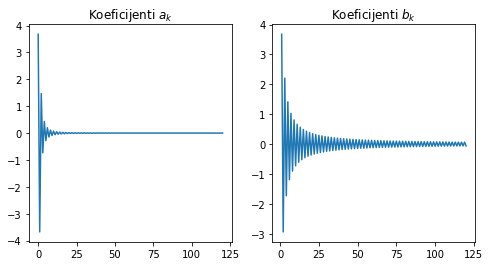

In [25]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(np.append(ae0,aek))
plt.title("Koeficijenti $a_k$")

plt.subplot(1,2,2)
plt.plot(k,bek)
plt.title("Koeficijenti $b_k$");

In [26]:
sinkt , coskt=np.sin(M) , np.cos(M)

def stepen(stp):
    F=ae0+coskt[:,:stp]@aek[:stp]+sinkt[:,:stp]@bek[:stp]   #vrednosti Furijeovog razvoja
    plt.figure(figsize=(4,4))
    plt.plot(t,F)
    plt.plot(t,fe)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.xticks(np.pi*np.arange(-1,1.1,0.5))
    plt.ylim(-5, 30)
    plt.grid()

In [27]:
interactive_plot = widgets.interact(stepen, stp=(0,120))
interactive_plot

interactive(children=(IntSlider(value=60, description='stp', max=120), Output()), _dom_classes=('widget-intera…

<function __main__.stepen(stp)>

Uočavamo da sa porastom stepena Furijeovog polinoma njegov grafik se sve više približava grafiku funkcije $f.$ Zbog periodičnosti Furijeov polinom uzima iste vrednosti na krajevima intervala. Tu nastaje odstupanje od grafika funkcije $f(t)=e^t$ s obzirom da ona nije periodična.

**Primer 5.** Prostor $\mathcal{C}=\mathcal{L}(\{\cos(mt),\ m\in\mathbb{N}_0\})$ sadrži parne periodične funkcije na segmentu $[-\pi,\pi],$ dok prostor $\mathcal{S}=\mathcal{L}(\{\sin(kt),\ k\in\mathbb{N}\})$ sadrži neparne periodične funkcije na istom segmentu. Projekcija funkcije $f:[-\pi,\pi]\mapsto\mathbb{R}$ na neki od potprostora $\mathcal{C}$ ili $\mathcal{S}$ biće shodno tome parna ili neparna funkcija. Posledica ovog opažanja je da parne funkcije poseduju samo razvoj u kosinusni red $(b_k=0),$ a neparne funkcije imaju razvoj u sinusni red $(a_k=0).$ 

Potražićemo Furijeove razvoje funkcija $f(t)=t$ i $g(t)=t^2$ na segmentu $[-\pi,\pi].$
\begin{align}
a_0&=\dfrac{1}{2\pi}\int_{-\pi}^{\pi}f(t)\,dt=\dfrac{1}{2\pi}\int_{-\pi}^{\pi}t\,dt=0,\mbox{ jer se radi o neparnoj funkciji}.\\ 
a_k&= \dfrac{1}{\pi}\int_{-\pi}^{\pi}f(t)\cos(kt)\,dt= \dfrac{1}{\pi}\int_{-\pi}^{\pi}t\cos(kt)\,dt=0,\mbox{ jer se radi o neparnoj funkciji}.\\
b_k&= \dfrac{1}{\pi}\int_{-\pi}^{\pi}f(t)\sin(kt)\,dt=\dfrac{1}{\pi}\int_{-\pi}^{\pi}t\sin(kt)\,dt
=\dfrac{2}{\pi}\int_{0}^{\pi}t\sin(kt)\,dt,\mbox{ jer se radi o parnoj funkciji}.\\
\int_{0}^{\pi}t\sin(kt)\,dt&=\begin{vmatrix}u=t&du=dt\\ dv=\sin(kt)dt&v=-\dfrac{\cos(k t)}{k}\end{vmatrix}
=-\dfrac1k\,t\cos(kt)\big|_0^{\pi}+\dfrac1k\int_{0}^{\pi}\cos(kt)\,dt\\
&=\dfrac{(-1)^{k+1}\pi}{k}+\dfrac1{k^2}\sin(kt)\big|_0^{\pi}=\dfrac{(-1)^{k+1}\pi}k,\\
b_k&=\dfrac{(-1)^{k+1}2}k\,.
\end{align}

In [28]:
a0, ak=0 , np.zeros(s)
bk=2/k
bk[1::2]=-bk[1::2]
f=t.copy()

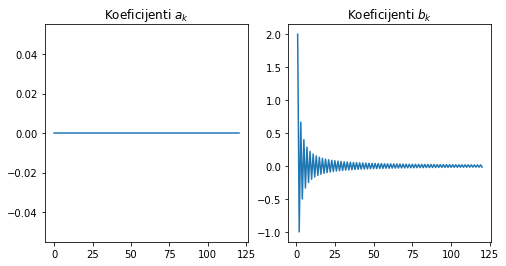

In [29]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(np.append(a0,ak))
plt.title("Koeficijenti $a_k$")

plt.subplot(1,2,2)
plt.plot(k,bk)
plt.title("Koeficijenti $b_k$");

In [30]:
def stepen(stp):
    F=a0+coskt[:,:stp]@ak[:stp]+sinkt[:,:stp]@bk[:stp]   #vrednosti Furijeovog razvoja
    plt.figure(figsize=(4,4))
    plt.plot(t,F)
    plt.plot(t,f)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.xticks(np.pi*np.arange(-1,1.1,0.5))
    plt.ylim(-np.pi, np.pi)
    plt.grid()

In [31]:
interactive_plot = widgets.interact(stepen, stp=(0,120))
interactive_plot

interactive(children=(IntSlider(value=60, description='stp', max=120), Output()), _dom_classes=('widget-intera…

<function __main__.stepen(stp)>

\begin{align}
a_0&=\dfrac{1}{2\pi}\int_{-\pi}^{\pi}g(t)\,dt=\dfrac{1}{2\pi}\int_{-\pi}^{\pi}t^2\,dt=\dfrac{1}{\pi}\int_{0}^{\pi}t^2\,dt=
\dfrac{t^3}{3\pi}\bigg|_0^{\pi}=\dfrac{\pi^2}{3}.\\ 
a_k&= \dfrac{1}{\pi}\int_{-\pi}^{\pi}g(t)\cos(kt)\,dt= \dfrac{1}{\pi}\int_{-\pi}^{\pi}t^2\cos(kt)\,dt=
\dfrac{2}{\pi}\int_{0}^{\pi}t^2\cos(kt)\,dt=\dots=\dfrac{(-1)^k4}{k^2}.\\
b_k&= \dfrac{1}{\pi}\int_{-\pi}^{\pi}g(t)\sin(kt)\,dt=\dfrac{1}{\pi}\int_{-\pi}^{\pi}t^2\sin(kt)\,dt
=0,\mbox{ jer se radi o neparnoj funkciji}.
\end{align}

In [32]:
a0 =(np.pi**2)/3
ak=4/(k**2)
ak[::2]=-ak[::2]
bk=np.zeros(s)
f=t**2

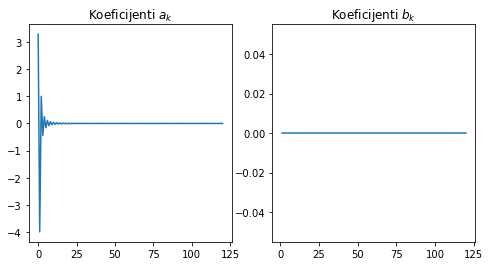

In [33]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(np.append(a0,ak))
plt.title("Koeficijenti $a_k$")

plt.subplot(1,2,2)
plt.plot(k,bk)
plt.title("Koeficijenti $b_k$");

In [34]:
def stepen(stp):
    F=a0+coskt[:,:stp]@ak[:stp]+sinkt[:,:stp]@bk[:stp]   #vrednosti Furijeovog razvoja
    plt.figure(figsize=(4,4))
    plt.plot(t,F)
    plt.plot(t,f)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.xticks(np.pi*np.arange(-1,1.1,0.5))
    plt.ylim(-1, np.pi**2+1)
    plt.grid()

In [35]:
interactive_plot = widgets.interact(stepen, stp=(0,120))
interactive_plot

interactive(children=(IntSlider(value=60, description='stp', max=120), Output()), _dom_classes=('widget-intera…

<function __main__.stepen(stp)>

Svaka funkcija $f:[-\pi,\pi]\mapsto\mathbb{R}$ može da se predstavi kao zbir jedne parne i jedne neparne funkcije. Zaista, 
$$f_P(t)=\dfrac{f(t)+f(-t)}2,\qquad f_N(t)=\dfrac{f(t)-f(-t)}2,\qquad f(t)=f_P(t)+f_P(-t).$$
Projekciju funkcije $f$ na potprostor $\mathcal{C}$ zovemo kosinusna transformacija funkcije $f.$ Kosinusna transformacija funkcije $f$ je zapravo razvoj u Furijeov red njene parne komponente $f_P(t).$

Tako npr. za eksponencijalnu funkciju $f(t)=e^t$ imamo $f_P(t)=\cosh(t),\ f_N(t)=\sinh(t).$ 

In [36]:
cht , sht=np.cosh(t) , np.sinh(t)

def stepen(stp):
    FP, FN=ae0+coskt[:,:stp]@aek[:stp], sinkt[:,:stp]@bek[:stp]
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    plt.plot(t,FP+FN)
    plt.plot(t,fe)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.xticks(np.pi*np.arange(-1,1.1,0.5))
    plt.ylim(-5, 30)
    plt.grid()
    plt.title("Furijeov polinom $e^t$")

    plt.subplot(1,3,2)
    plt.plot(t,FP)
    plt.plot(t,cht)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.xticks(np.pi*np.arange(-1,1.1,0.5))
    plt.ylim(-5, 30)
    plt.grid()
    plt.title("Furijeov polinom $\cosh t$");

    plt.subplot(1,3,3)
    plt.plot(t,FN)
    plt.plot(t,sht)
    plt.axhline(color='gray', zorder=-1)
    plt.axvline(color='gray', zorder=-1)
    plt.xticks(np.pi*np.arange(-1,1.1,0.5))
    plt.ylim(-15, 15)
    plt.grid()
    plt.title("Furijeov polinom $\sinh t$");

In [37]:
interactive_plot = widgets.interact(stepen, stp=(0,120))
interactive_plot

interactive(children=(IntSlider(value=60, description='stp', max=120), Output()), _dom_classes=('widget-intera…

<function __main__.stepen(stp)>

Slično težinskom skalarnom proizvodu vektora, i skalarni proizvod funkcija može da sadrži težinske koeficijente koji su vrednosti neke nenegativne funkcije. Skalarni proizvod tada glasi
$$\langle f,g\rangle_w=\int_a^bw(t)f(t)g(t)\,dt,\qquad w(t)\geq0,\ t\in(a,b).$$

**Primer 6.** Iskoristićemo ortogonalnost funkcija $1,\cos t,\cos(2t),\dots,\cos(nt),\dots$ Podsetimo se da je
\begin{align}
1&=\cos(0t)=T_0(\cos t),\\
\cos t&=T_1(\cos t), \qquad \sin t=\sin t\, S_0(\cos t),\\
\cos(2t)&=\cos^2t-\sin^2t=\cos^2t-(1-\cos^2t)=2\cos^2t-1=T_2(\cos t),\\
\sin(2t)&=2\sin t\cos t=2\sin t\, T_1(\cos t),\\
\cos(3t)&=\cos(2t)\cos t-\sin(2t)\sin t=(2\cos^2t-1)\cos t-2\sin^2t\,\cos t=(2\cos^2t-1)\cos t-2(1-\cos^2t)\cos t\\\
&=(4\cos^2t-3)\cos t=4\cos^3t-3\cos t=T_3(\cos t),\\
&\vdots
\end{align}

Slično, imajući u vidu 
\begin{align}
\cos(k+1)t&=\cos(k-1)t\cos(2t)-\sin(2t)\sin(k-1)t=(2\cos^2t-1)T_{k-1}(\cos t)-2\sin^2t\cos t\,S_{k-2}(\cos t)\\ 
&=\cos t\,T_k(\cos t)-(1-\cos^2t)S_{k-1}(\cos t)=T_{k+1}(\cos t),\\
\sin(k+1)t&=\sin(kt)\cos t+\cos(kt)\sin t=\sin t\cos t\,S_{k-1}(\cos t)+\sin t\,T_k(\cos t)\\
&=\sin t\,S_k(\cos t),
\end{align}
koristeći indukciju dobijamo da je funkcija $\cos(kt)$ polinom $k-$tog stepena po $\cos t,$
$$\cos(kt)=T_k(\cos t).$$

Uvedimo smenu $x=\cos t.$ Polinomi $T_k(x)$ su ortogonalni jer su nastali primenom smene u ortogonalnim funkcijama. Interesantno je pogledati u odnosu na koji skalarni proizvod su ovo ortogonalne funkcije:
\begin{align}
0&=\displaystyle\int_{-\pi}^{\pi}\cos(kt)\cos(mt)\,dt=2\displaystyle\int_{0}^{\pi}\cos(kt)\cos(mt)\,dt=
\begin{vmatrix}x=\cos t ,\  t=\arccos x\\ dt=-\dfrac{dx}{\sqrt{1-x^2}}\\
0\mapsto\cos0=1,\ \pi\mapsto\cos\pi=-1\end{vmatrix}\\
&=2\displaystyle\int_{-1}^1\dfrac{T_k(x)T_m(x)}{\sqrt{1-x^2}}\,dx
\end{align}

Zaključujemo da su polinomi $T_k(x)$ ortogonalni na segmentu $[-1,1]$ u odnosu na težinsku funkciju $\dfrac{1}{\sqrt{1-x^2}}.$ Polinomi $$T_0(x)=1,\ T_1(x)=x,\ T_2(x)=2x^2-1,\ T_3(x)=4x^3-3x,\dots$$
nazivaju se [Čebiševljevi polinomi](https://en.wikipedia.org/wiki/Chebyshev_polynomials) prve vrste.

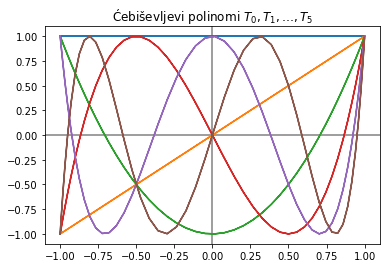

In [125]:
t=np.pi*np.linspace(-1,1,100)
x=np.cos(t)
k=np.arange(6)
M=np.cos(np.outer(t,k))
plt.plot(x,M)
plt.title("Ćebiševljevi polinomi $T_0,T_1,\dots,T_5$")
plt.axhline(color='gray', zorder=-1)
plt.axvline(color='gray', zorder=-1);

Zbog njihove trigonometrijske prirode Čebiševljevi polinomi imaju svojstva koja ih izdvajaju u odnosu druge polinome u problemima aproksimacije. Sve ekstremne vrednosti Čebiševljevih polinoma iznose $-1$ ili $1$ i, što je još važnije, tačke ekstremuma su za različite stepene $k$ različito distribuirane. Ovo svojstvo omogućava ravnomerniju distribuciju grešaka kada se Čebiševljevi polinomi koriste kao bazisne funkcije u postupku aproksimacije.

U interpolaciji neprekidnih funkcija, veoma je korisno da se za čvorove interpolacije biraju nule ili tačke ekstremuma Čebiševljevih polinoma. Na taj način se postiže da maksimalna greška interpolacije na intervalu bude minimizirana.

## Diskretizacija

U primerima 1. i 2. videli smo kako na osnovu diskretnog skupa podataka (ortogonalnih matrica) formiramo ortogonalne funkcije sa kontinualnim domenom. Ovakav proces može da se odvija i u drugom smeru. Na osnovu ortogonalnih funkcija sa kontinualnim domenom kreiramo ortogonalne matrice u svrhe transformacija podataka. Ovo je veoma prirodan proces s obzirom na rad sa računarima. Naime, u realnim situacijama o funkciji $f$ najčešće raspolažemo samo konačnim skupom vrednosti $\{f(t_k)\ |\ k=0,1,\dots,N-1\}.$ Shodno tome, skalarne proizvode i norme funkcija možemo da računamo jedino u kontekstu tih vektora vrednosti,
$$f\cdot g=\sum_{k=0}^{N-1}f(t_k)g(t_k),\qquad \|f\|^2=\sum_{k=0}^{N-1}f(t_k)^2.\tag{5}$$

Osnovni harmonici $\sin(nt),\ \cos(mt),\ n\in\mathbb{N},\ m\in\mathbb{N}_0$ imaju još jedno veoma bitno svojstvo ortogonalnosti : ortogonalni su i za jednu veoma posebnu diskretizaciju domena $[0,2\pi],$ odnosno $[-\pi,\pi].$

Neka su $t_k=\dfrac{k}{N}2\pi\in[0,2\pi),\ k=0,1,\dots,N-1,$ odnosno $t_k=\dfrac{k}{N}2\pi-\pi\in[-\pi,\pi),\ k=0,1,\dots,N-1,$ dati čvorovi. Primetimo da se desna granica segmenta ne uzima ni u jednom slučaju. Pretpostavka je da zbog periodičnosti funkcije $f$ važi $f(0)=f(2\pi),$ odnosno $f(-\pi)=f(\pi).$ Osnovni harmonici su ortogonalni na ovom diskretnom skupu čvorova.

Izračunavanjem ćemo ptražiti vrednosti iz jednakosti $(5)$ za male vrednosti $m,$ gde je  $\sin(jt),\ \cos(kt),\ j,k\leq m.$ 

In [44]:
def ortog(m,N):
    t=np.pi*np.arange(-1,1,2/N)   #na segmentu [-pi,pi]
    M=np.outer(t,np.arange(1,m))
    cosM , sinM = np.cos(M) , np.sin(M)
    print(np.round(cosM.T@sinM,4))
    print(np.round(cosM.T@cosM,4))
    print(np.round(sinM.T@sinM,4))

In [45]:
rezultat=widgets.interact(ortog, N=(15, 30, 1), m=(1, 10, 1))
rezultat

interactive(children=(IntSlider(value=5, description='m', max=10, min=1), IntSlider(value=22, description='N',…

<function __main__.ortog(m, N)>

In [46]:
def ortog(m,N):
    t=np.pi*np.arange(0,2,2/N)   #na segmentu [0,2pi]
    M=np.outer(t,np.arange(1,m))
    cosM , sinM = np.cos(M) , np.sin(M)
    print(np.round(cosM.T@sinM,3))
    print(np.round(cosM.T@cosM,3))
    print(np.round(sinM.T@sinM,3))

In [47]:
rezultat=widgets.interact(ortog, N=(15, 30, 1), m=(1, 10, 1))
rezultat

interactive(children=(IntSlider(value=5, description='m', max=10, min=1), IntSlider(value=22, description='N',…

<function __main__.ortog(m, N)>

U opštem slučaju dokaz ortogonalnosti i vrednosti norme posledica su osobina kompleksnih korena jedinice.
Podsetimo se Ojlerovog oblika kompleksnog broja i geometrijske sume.
\begin{align}
&\cos\varphi+i\sin\varphi=e^{i\varphi},\qquad &&\cos\varphi-i\sin\varphi=e^{-i\varphi}\\
&\cos\varphi=\dfrac{e^{i\varphi}+e^{-i\varphi}}2,\qquad && \sin\varphi=\dfrac{e^{i\varphi}-e^{-i\varphi}}{2i}
\end{align}
$$1+q+q^2+\dots+q^{N-1}=\begin{cases}\dfrac{1-q^N}{1-q},&q\neq1\\
N,&q=1\end{cases}$$

Tražimo vrednost skalarnog proizvoda $f\cdot g=\displaystyle\sum_{k=0}^{N-1}f(t_k)g(t_k)$ za $f,g\in\{\cos(mt),\ \sin(nt)\},$ $t_k=\dfrac{k}{N}2\pi\in[0,2\pi),\ k=0,1,\dots,N-1,$ odnosno vrednosti izraza
$$\cos(mt)\cdot \sin(nt)=\sum_{k=0}^{N-1}\cos(mt_k)\sin(nt_k),\quad 
\cos(mt)\cdot \cos(nt)=\sum_{k=0}^{N-1}\cos(mt_k)\cos(nt_k),\quad 
\sin(mt)\cdot \sin(nt)=\sum_{k=0}^{N-1}\sin(mt_k)\sin(nt_k).$$

Primetimo da je
$$e^{icNt_k}=\big(e^{iNt_k}\big)^c=\big(e^{iN\frac{k}{N}2\pi}\big)^c=1.$$

\begin{align}
m=0,\ n\geq1:\qquad \displaystyle\sum_{k=0}^{N-1}\cos(0\cdot t_k)\sin(nt_k) &=\sum_{k=0}^{N-1}\sin(nt_k)
=\sum_{k=0}^{N-1}\dfrac{e^{int_k}-e^{-int_k}}{2i}\\
&=\dfrac{1}{2i}\left(\displaystyle\sum_{k=0}^{N-1}e^{int_k}-\sum_{k=0}^{N-1}e^{-int_k}\right)
=\dfrac{1}{2i}\left(\dfrac{1-e^{inNt_k}}{1-e^{int_k}}-\dfrac{1-e^{-inNt_k}}{1-e^{-int_k}}\right)=0,\\[6pt]
m,n\geq1:\qquad \displaystyle\sum_{k=0}^{N-1}\cos(mt_k)\sin(nt_k) &=
\sum_{k=0}^{N-1}\dfrac{e^{imt_k}+e^{-imt_k}}{2}\dfrac{e^{int_k}-e^{-int_k}}{2i}\\
&=\dfrac{1}{4i}\left(\displaystyle\sum_{k=0}^{N-1}e^{i(m+n)t_k}-\sum_{k=0}^{N-1}e^{i(m-n)t_k}+\sum_{k=0}^{N-1}e^{-i(m-n)t_k}-\sum_{k=0}^{N-1}e^{-i(m+n)t_k}\right)=0,\\[6pt]
m=0,\ n=0:\qquad  \displaystyle\sum_{k=0}^{N-1}\cos(0\cdot t_k)\cos(0t_k) &=\sum_{k=0}^{N-1}1=N,\\[6pt]
m=0,\ n\geq1:\qquad   \displaystyle\sum_{k=0}^{N-1}\cos(0\cdot t_k)\cos(nt_k) &=\sum_{k=0}^{N-1}\cos(nt_k)
=\sum_{k=0}^{N-1}\dfrac{e^{int_k}+e^{-int_k}}{2}\\
&=\dfrac{1}{2}\left(\displaystyle\sum_{k=0}^{N-1}e^{int_k}+\sum_{k=0}^{N-1}e^{-int_k}\right)
=\dfrac{1}{2}\left(\dfrac{1-e^{inNt_k}}{1-e^{int_k}}+\dfrac{1-e^{-inNt_k}}{1-e^{-int_k}}\right)=0
\end{align}

I tako dalje. Dobijamo da su diskretne norme osnovnih harmonika: $\|1\|^2=N,\ \|\cos(mt)\|^2=\|\sin(mt)\|^2=\dfrac{N}{2}\,.$

Jednakosti $(5)$ se analogno pokazuju i za interval $[-\pi,\pi].$

## Diskretna Furijeova transformacija

Ortogonalnost osnovnih harmonika na diskretnom skupu vrednosti koristi se za dobijanje informacija o periodičnosti u diskretnom skupu podataka. Za vektor vrednosti $f(t)\equiv y=\begin{bmatrix}y_0&y_1&\dots&y_{N-1}\end{bmatrix}$ i skalarni proizvod $(5),$ 
izrazi 
$$a_0=\dfrac{f(t)\cdot\cos(0t)}{\cos(0t)\cdot\cos(0t)}=\dfrac{1}{N}\sum_{k=0}^{N-1}y_k,\qquad a_m=\dfrac{f(t)\cdot\cos(mt)}{\cos(mt)\cdot\cos(mt)}=\dfrac{2}{N}\sum_{k=0}^{N-1}y_k\cos(mt_k),$$
$$b_m=\dfrac{f(t)\cdot\sin(mt)}{\sin(mt)\cdot\sin(mt)}=\dfrac{2}{N}\sum_{k=0}^{N-1}y_k\sin(mt_k), $$
daju Furijeove koordinate vektora $y$ u odnosu na odgovarajuću ortogonalnu bazu. Do kog $m$ vršiti razvoj?

Ortogonalnost harmonika na diskretnom skupu dolazi sa određenim ograničenjima. To će biti uočljivo na sledećem primeru.

**Primer 7.** Posmatrajmo funkcije $h_j(x)=\cos(jx),$ $j=0,1,\dots,5,$ i uticaj uzorkovanja ovih funkcija u čvorovima $x_k=k\dfrac{2\pi}{3},$ $k=0,1,2.$ 
- $j=0$ $:\quad h_0(x)=1,\hspace{2.15cm} h_0(0)=1,$ $h_0(2\pi/3)=1,$ $h_0(4\pi/3)=0.$
- $j=1$ $:\quad h_1(x)=\cos(x),\hspace{1.25cm} h_1(0)=1,$ $h_1(2\pi/3)=-1/2,$ $h_1(4\pi/3)=-1/2.$
- $j=2$ $:\quad h_2(x)=\cos(2x),\qquad h_2(0)=1,$ $h_2(2\pi/3)=-1/2,$ $h_2(4\pi/3)=-1/2.$
- $j=3$ $:\quad h_3(x)=\cos(3x),\qquad h_3(0)=1,$ $h_3(2\pi/3)=1,$ $h_3(4\pi/3)=1.$
- $j=4$ $:\quad h_4(x)=\cos(4x),\qquad h_4(0)=1,$ $h_4(2\pi/3)=-1/2,$ $h_3(4\pi/3)=-1/2.$
- $j=5$ $:\quad h_5(x)=\cos(5x),\qquad h_5(0)=1,$ $h_5(2\pi/3)=-1/2,$ $h_5(4\pi/3)=-1/2.$

Za mali broj uzoraka harmonici višeg reda se ne razlikuju među sobom. Zaključujemo da mali broj uzoraka funkcije, tj. mali broj čvorova dovodi do veće netačnosti u interpretaciji podataka. Drugim rečima, skup od $N$ podataka ostavlja nevidljivim karakteristike podataka iz frekvencija većih od $\Big\lfloor\dfrac{N-1}{2}\Big\rfloor.$

Iz pokazane diskretne ortogonalnosti osnovnih harmonika sledi i ortogonalnost kompleksnih vektora
$$v=\begin{bmatrix}1&e^{imt_k}&e^{i2mt_k}&\dots&&e^{im(N-1)t_k}\end{bmatrix}^T,\qquad 
u=\begin{bmatrix}1&e^{int_k}&e^{i2nt_k}&\dots&&e^{in(N-1)t_k}\end{bmatrix}^T.$$

\begin{align}
v\cdot u&=\displaystyle\sum_{j=0}^{N-1}e^{imjt_k}\overline{e^{injt_k}}
=\sum_{j=0}^{N-1}e^{imjt_k}e^{-injt_k}=\sum_{j=0}^{N-1}e^{i(m-n)jt_k}
=\begin{cases}\dfrac{1-e^{i(m-n)Nt_k}}{1-e^{i(m-n)jt_k}},&m\neq n\\
N,&m=n\end{cases}\\
&=\begin{cases}0,&m\neq n\\
N,&m=n\end{cases}
\end{align}

Ova kompleksna ortogonalnost je naredna tema. 